#  **Coleta e Prepara√ß√£o dos Dados (ETL)**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('/content/dados_tratados.csv')

# Exibe as primeiras linhas do Dataframe
df.head()

customer_id  churn  gender  senior_citizen  partner  dependents  tenure  \
0  0002-ORFBO      0  Female               0        1           1       9   
1  0003-MKNFE      0    Male               0        0           0       9   
2  0004-TLHLJ      1    Male               0        0           0       4   
3  0011-IGKFF      1    Male               1        1           0      13   
4  0013-EXCHZ      1  Female               1        1           0       3   

   phone_service multiple_lines internet_service  ... tech_support  \
0              1            0.0              DSL  ...          1.0   
1              1            1.0              DSL  ...          0.0   
2              1            0.0      Fiber optic  ...          0.0   
3              1            0.0      Fiber optic  ...          0.0   
4              1            0.0      Fiber optic  ...          1.0   

  streaming_tv streaming_movies        contract paperless_billing  \
0          1.0              0.0        One year                 1   
1          0.0              1.0  Month-to-month                 0   
2          0.0              0.0  Month-to-month                 1   
3          1.0              1.0  Month-to-month                 1   
4          1.0              0.0  Month-to-month                 1   

     payment_method charges_monthly  charges_total contas_diarias  \
0      Mailed check            65.6         593.30           2.19   
1      Mailed check            59.9         542.40           2.00   
2  Electronic check            73.9         280.85           2.46   
3  Electronic check            98.0        1237.85           3.27   
4      Mailed check            83.9         267.40           2.80   

   quantidade_servicos  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 23 columns]

In [12]:
# Exibe as informa√ß√µes gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   churn                7032 non-null   int64  
 1   gender               7032 non-null   object 
 2   senior_citizen       7032 non-null   int64  
 3   partner              7032 non-null   int64  
 4   dependents           7032 non-null   int64  
 5   tenure               7032 non-null   int64  
 6   phone_service        7032 non-null   int64  
 7   multiple_lines       7032 non-null   object 
 8   internet_service     7032 non-null   object 
 9   online_security      7032 non-null   object 
 10  online_backup        7032 non-null   object 
 11  device_protection    7032 non-null   object 
 12  tech_support         7032 non-null   object 
 13  streaming_tv         7032 non-null   object 
 14  streaming_movies     7032 non-null   object 
 15  contract             7032 non-null   o

In [13]:

# Converte colunas num√©ricas para o tipo adequado
df['charges_monthly'] = pd.to_numeric(df['charges_monthly'], errors='coerce')
df['charges_total'] = pd.to_numeric(df['charges_total'], errors='coerce')


In [14]:
# Aplica One-Hot Encoding nas colunas categ√≥ricas
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)


##  **Limpeza e pr√© processamento de dados**




In [5]:
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total', 'contas_diarias',
       'quantidade_servicos'],
      dtype='object')


In [8]:
# Remover espa√ßos extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar novamente os nomes das colunas
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total', 'contas_diarias',
       'quantidade_servicos'],
      dtype='object')


In [9]:
df.columns = df.columns.str.replace('\xa0', ' ')  # Substitui espa√ßos n√£o separ√°veis por espa√ßos normais


In [10]:
total_charges = df.get('charges_total')
if total_charges is not None:
    print(total_charges)
else:
    print("Coluna 'charges_total' n√£o encontrada.")


0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7027     742.90
7028    1873.70
7029      92.75
7030    4627.65
7031    3707.60
Name: charges_total, Length: 7032, dtype: float64


In [11]:
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total', 'contas_diarias',
       'quantidade_servicos'],
      dtype='object')


# **Verifica a distribui√ß√£o da vari√°vel alvo 'Churn'**

churn
0    5163
1    1869
Name: count, dtype: int64
churn
0    73.421502
1    26.578498
Name: count, dtype: float64


/tmp/ipython-input-3317197446.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_encoded, palette='pastel')


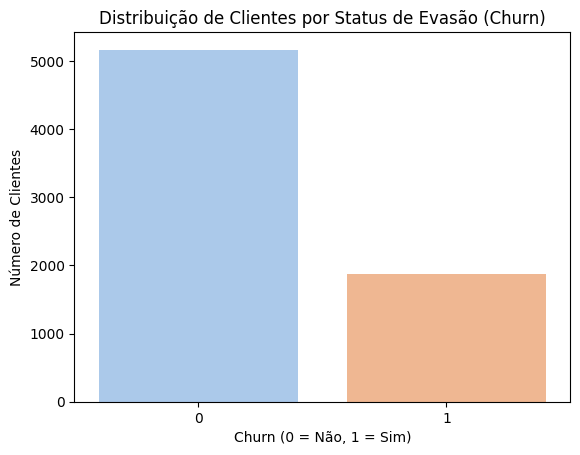

In [17]:
# Verifica a distribui√ß√£o da vari√°vel alvo 'Churn'
churn_counts = df_encoded['churn'].value_counts()
print(churn_counts)

# Exibe a propor√ß√£o de cada classe
churn_proportion = churn_counts / len(df_encoded) * 100
print(churn_proportion)

# Visualiza a distribui√ß√£o com um gr√°fico de barras
sns.countplot(x='churn', data=df_encoded, palette='pastel')
plt.title('Distribui√ß√£o de Clientes por Status de Evas√£o (Churn)')
plt.xlabel('Churn (0 = N√£o, 1 = Sim)')
plt.ylabel('N√∫mero de Clientes')
plt.show()


# **An√°lise Explorat√≥ria de Dados (EDA)**

In [18]:
# Estat√≠sticas descritivas
df.describe()


churn  senior_citizen      partner   dependents       tenure  \
count  7032.000000     7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.265785        0.162400     0.482509     0.298493    32.421786   
std       0.441782        0.368844     0.499729     0.457629    24.545260   
min       0.000000        0.000000     0.000000     0.000000     1.000000   
25%       0.000000        0.000000     0.000000     0.000000     9.000000   
50%       0.000000        0.000000     0.000000     0.000000    29.000000   
75%       1.000000        0.000000     1.000000     1.000000    55.000000   
max       1.000000        1.000000     1.000000     1.000000    72.000000   

       phone_service  paperless_billing  charges_monthly  charges_total  \
count    7032.000000        7032.000000      7032.000000    7032.000000   
mean        0.903299           0.592719        64.798208    2283.300441   
std         0.295571           0.491363        30.085974    2266.771362   
min         0.000000           0.000000        18.250000      18.800000   
25%         1.000000           0.000000        35.587500     401.450000   
50%         1.000000           1.000000        70.350000    1397.475000   
75%         1.000000           1.000000        89.862500    3794.737500   
max         1.000000           1.000000       118.750000    8684.800000   

       contas_diarias  quantidade_servicos  
count     7032.000000          7032.000000  
mean         2.159891             0.286547  
std          1.002955             0.452180  
min          0.610000             0.000000  
25%          1.187500             0.000000  
50%          2.340000             0.000000  
75%          2.992500             1.000000  
max          3.960000             1.000000

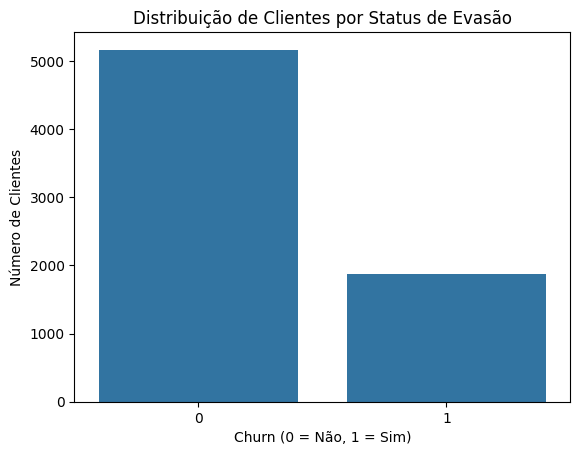

In [21]:
 # Distribui√ß√£o da Vari√°vel Alvo
import seaborn as sns
import matplotlib.pyplot as plt

# Gr√°fico de barras da vari√°vel 'Churn'
sns.countplot(x='churn', data=df)
plt.title('Distribui√ß√£o de Clientes por Status de Evas√£o')
plt.xlabel('Churn (0 = N√£o, 1 = Sim)')
plt.ylabel('N√∫mero de Clientes')
plt.show()


# **An√°lise de Correla√ß√£o**

In [23]:
# Calcular a matriz de correla√ß√£o apenas para colunas num√©ricas
corr_matrix = df.corr(numeric_only=True)

# Exibir a matriz de correla√ß√£o
print(corr_matrix)


                        churn  senior_citizen   partner  dependents    tenure  \
churn                1.000000        0.150541 -0.149982   -0.163128 -0.354049   
senior_citizen       0.150541        1.000000  0.016957   -0.210550  0.015683   
partner             -0.149982        0.016957  1.000000    0.452269  0.381912   
dependents          -0.163128       -0.210550  0.452269    1.000000  0.163386   
tenure              -0.354049        0.015683  0.381912    0.163386  1.000000   
phone_service        0.011691        0.008392  0.018397   -0.001078  0.007877   
paperless_billing    0.191454        0.156258 -0.013957   -0.110131  0.004823   
charges_monthly      0.192858        0.219874  0.097825   -0.112343  0.246862   
charges_total       -0.199484        0.102411  0.319072    0.064653  0.825880   
contas_diarias       0.192914        0.219848  0.097884   -0.112395  0.246874   
quantidade_servicos -0.171270       -0.038576  0.143346    0.080786  0.328297   

                     phone_



# **Visualizando a Matriz de Correla√ß√£o com um Heatmap**

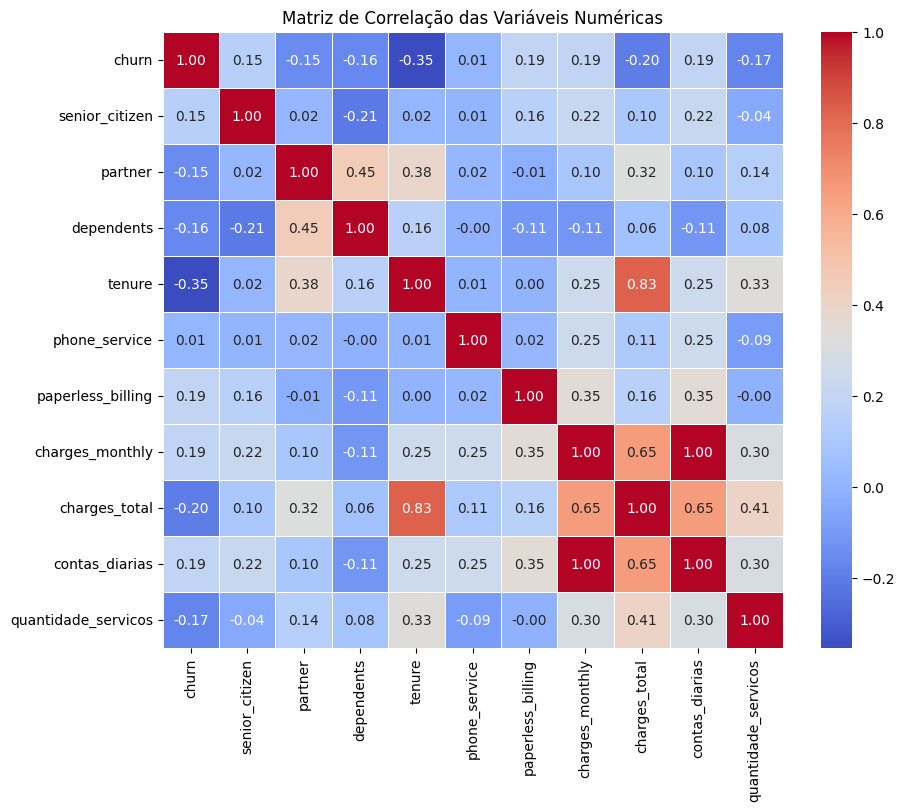

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionar t√≠tulo
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')

# Exibir o gr√°fico
plt.show()


# **`Pr√©-processamento para Modelagem`**

In [26]:
# Vari√°veis independentes e dependente
X = df.drop(columns=['churn'])
y = df['churn']


In [27]:
# Codifica√ß√£o One-Hot
X_encoded = pd.get_dummies(X, drop_first=True)


# **Modelagem Preditiva**

In [28]:
from sklearn.model_selection import train_test_split

# Divis√£o dos dados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression

# Inicializar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Avalia√ß√£o do Modelo**

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previs√µes
y_pred = model.predict(X_test)

# Avalia√ß√£o
print('Acur√°cia:', accuracy_score(y_test, y_pred))
print('Relat√≥rio de Classifica√ß√£o:\n', classification_report(y_test, y_pred))
print('Matriz de Confus√£o:\n', confusion_matrix(y_test, y_pred))


Acur√°cia: 0.7910447761194029
Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Matriz de Confus√£o:
 [[911 122]
 [172 202]]




# **Visualiza√ß√£o dos Resultadoso**

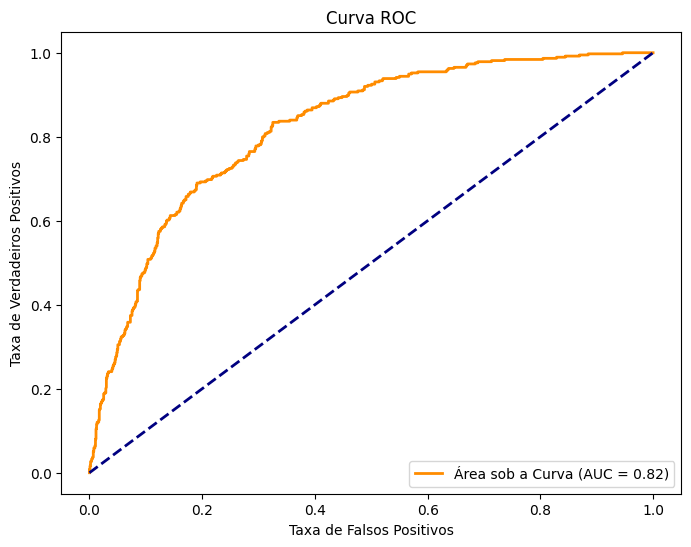

In [31]:
from sklearn.metrics import roc_curve, auc

# Probabilidades de previs√£o
y_prob = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'√Årea sob a Curva (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.show()


# **üìä Relat√≥rio de An√°lise de Churn ‚Äì Telecom X**

---



A Telecom X est√° enfrentando uma taxa significativa de evas√£o de clientes (churn). Este relat√≥rio apresentou uma an√°lise explorat√≥ria dos dados para identificar padr√µes e fatores associados ao churn, visando fornecer insights para estrat√©gias de reten√ß√£o.

** Estat√≠stica Descritiva **

A base de dados cont√©m 7.032 registros e 11 vari√°veis preditoras. Destacam-se:
Idade m√©dia dos clientes: 32,4 meses de contrato.

*   Idade m√©dia dos clientes: 32,4 meses de contrato.
*   Distribui√ß√£o de g√™nero: 48,3% masculino e 51,7% feminino.
*   Churn: 26,6% dos clientes cancelaram o servi√ßo.

Vari√°veis cont√≠nuas:

* **Tenure**: m√©dia de 32,4 meses, com desvio padr√£o de 24,5 meses.

* **Charges Monthly**: m√©dia de 64,80 reais , com desvio padr√£o de R$ 30,09.

* **Charges Total**: m√©dia de 2.283,30 reais, com desvio padr√£o de R$ 2.266,77


**Matriz de Correla√ß√£o **
Observa-se que:

* **Tenure**: forte correla√ß√£o negativa com churn (-0,354), indicando que clientes com maior tempo de contrato t√™m menor probabilidade de cancelar.

* **Charges Monthly**: correla√ß√£o positiva com churn (0,193), sugerindo que clientes com valores mensais mais altos t√™m maior propens√£o ao churn.

* **Charges Total**: correla√ß√£o negativa com churn (-0,199), indicando que clientes com maiores valores totais pagos t√™m menor chance de cancelar.

Essas informa√ß√µes s√£o cruciais para identificar fatores que influenciam o churn e direcionar estrat√©gias de reten√ß√£o.

** Avalia√ß√£o do Modelo **

* **Acur√°cia**: 79,1%
* **Relat√≥rio de Classifica√ß√£o:**
  * ** Classe 0(n√£o churn)**:
        * Precis√£o: 0,84
        * Recall: 0,88
        * F1-score: 0,86

  * **Classe 1 (churn)**:
        * Precis√£o: 0,62
        * Recall: 0,54
        * F1-score: 0,58

* **Matriz de Confus√£o**:
    * Verdadeiros Positivos: 202
    * Falsos Positivos: 122
    * Verdadeiros Negativos: 911
     * Falsos Negativos: 172

* **AUC (√Årea sob a Curva ROC)**: 0,82


A AUC de 0,82 indica uma boa capacidade do modelo em distinguir entre clientes que ir√£o cancelar e os que n√£o ir√£o. No entanto, o recall da classe 1 (churn) √© relativamente baixo, sugerindo que o modelo pode estar perdendo clientes que ir√£o cancelar.


**Conclus√µes e recomenda√ß√µes**


* **Pontos fortes**:

    * Bom desempenho geral do modelo, com alta precis√£o na classe 0.

    * Identifica√ß√£o de fatores-chave que influenciam o churn.

* **√Åreas de melhoria**:

    * Aprimorar o recall da classe 1 para identificar mais clientes com risco de churn.

    * Considerar o uso de t√©cnicas como oversampling ou undersampling para lidar com o desequil√≠brio entre as classes.

    * Explorar a inclus√£o de vari√°veis adicionais que possam melhorar a previs√£o.

Este relat√≥rio serve como base para o desenvolvimento de estrat√©gias de reten√ß√£o mais eficazes e para o aprimoramento cont√≠nuo do modelo de previs√£o de churn.

